![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 16 - Parametric Clustering</center>
### <center> K-Means</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/16_ParametricClustering/MainKMeans.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

np.random.seed(1)

### Generate some data:

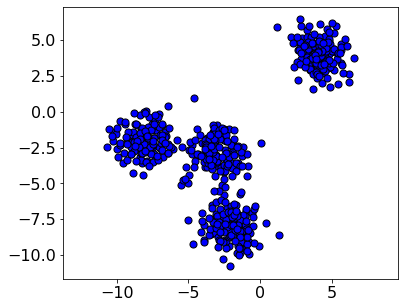

In [2]:
mMu = np.array([[4,   4],
                [-3, -3],
                [-2, -8],
                [-8, -2]])
Ni = 150
mX = np.row_stack([np.random.randn(Ni, 2) + vMu for vMu in mMu])
N  = mX.shape[0]

plt.figure (figsize=(6, 5))
plt.scatter(mX[:,0], mX[:,1], s=50, c='b', edgecolor='k')
plt.axis   ('equal')
plt.show   ()

### A simple implementation of the K-Means algorithm:

#### Step I:
Assume fixed centroids $\left\{ \boldsymbol{\mu}_{k}\right\} $, find
the optimal clusters $\left\{ \mathcal{D}_{k}\right\} $:  
$$\arg\min_{\left\{ \mathcal{D}_{k}\right\} }\sum_{k=1}^{K}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$$
<center>$\implies \boldsymbol{x}_{i}\in\mathcal{D}_{s\left(\boldsymbol{x}_{i}\right)}$ where $s\left(\boldsymbol{x}_{i}\right)=\arg\min_{k}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$</center>

#### Step II:
Assume fixed clusters $\left\{ \mathcal{D}_{k}\right\} $, find the
optimal centroids $\left\{ \boldsymbol{\mu}_{k}\right\} $.
$$\arg\min_{\left\{ \boldsymbol{\mu}_{k}\right\} }\sum_{k=1}^{K}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$$
$$\implies\boldsymbol{\mu}_{k}=\frac{1}{\left|\mathcal{D}_{k}\right|}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\boldsymbol{x}_{i}$$
#### Repeat until convergence.

In [3]:
from scipy.spatial.distance import cdist

def KMeans(mX, K, mMu0):

    N, d    = mX.shape
    lMu     = [mMu0]
    numIter = 20
    mMu     = np.full((K, d), np.nan)
    for ii in range(numIter):

        #-- Step 1, assign clusters:
        mD   = cdist(mX, lMu[-1])
        vIdx = np.argmin(mD, axis=1)

        #-- Step 2, compute clusters means
        for kk in range(K):
            mMu[kk,:] = np.mean(mX[vIdx == kk], axis=0)

        lMu.append(mMu.copy())
    
    return lMu #-- in practice, we only need to last one: lMu[-1]

### Apply the algorithm:

In [4]:
K    = 4                          #-- number of clusters
mMu0 = mX[[151, 152, 153, 154],:] #-- initial means

lMu  = KMeans(mX, K, mMu0)

### Plot function:

In [5]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def PlotKMeans(lMu, iteration):
    mMu  = lMu[iteration]
    mD   = cdist(mX, mMu)
    vIdx = np.argmin(mD, axis=1)
    vor  = Voronoi(mMu)
    
    fig = plt.figure(figsize=(6,5))
    plt.scatter    (mX [:,0], mX [:,1], c=vIdx, s=50, edgecolor='k')
    plt.plot       (mMu[:,0], mMu[:,1], '.r', markersize=20)
    voronoi_plot_2d(vor, ax=fig.axes[0], show_points=False, line_width=2, show_vertices=False)
    plt.title      ('Iteration = ' + str(iteration))
    plt.axis       ('equal')
    plt.axis       ([-12, 8, -12, 8])

In [6]:
from ipywidgets import interact, IntSlider, Layout

PlotAux    = lambda iteration: PlotKMeans(lMu, iteration)
iterSlider = IntSlider(min=0, max=10, step=1, value=0, layout=Layout(width='80%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='80%'), max=10), Output(…

### Apply the algorithm with a different initial clusters:

In [7]:
K    = 4                      #-- number of clusters
mMu0 = mX[[1, 152, 153, 3],:] #-- initial means
lMu  = KMeans(mX, K, mMu0)

In [8]:
PlotAux    = lambda iteration: PlotKMeans(lMu, iteration)
iterSlider = IntSlider(min=0, max=10, step=1, value=0, layout=Layout(width='80%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='80%'), max=10), Output(…

### Sk-learn implementation:
To obtain stable results:
* Multiple initialization `n_init`  
* Smart initialization `init` (kmean++)

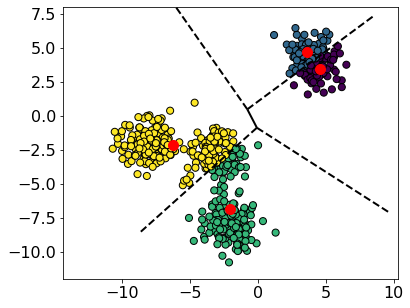

In [9]:
from sklearn.cluster import KMeans

KMeansFit = KMeans(n_clusters=K, n_init=1, init='random').fit(mX)
# KMeansFit = KMeans(n_clusters=K).fit(mX) #-- use default for stable results
vIdx      = KMeansFit.predict(mX)
mMu       = KMeansFit.cluster_centers_
vor       = Voronoi(mMu)

fig = plt.figure(figsize=(6,5))
plt.scatter    (mX [:,0], mX [:,1], c=vIdx, s=50, edgecolor='k')
plt.plot       (mMu[:,0], mMu[:,1], '.r', markersize=20)
voronoi_plot_2d(vor, ax=fig.axes[0], show_points=False, line_width=2, show_vertices=False)
plt.axis       ('equal')
plt.axis       ([-12, 8, -12, 8])
plt.show       ()

### Exercise (SuperPixels):
* Load the `Fruits.jpeg` image and covert it to NumPy ndarray `mI`:
$$\boldsymbol{I}\in\mathbb{R}^{\text{height}\times\text{width}\times3}$$
* Use the LAB color space (instead of RGB) (`mLAB`).
* Create a new "image" `mX` such that:
$$\boldsymbol{X}\in\mathbb{R}^{\text{height}\times\text{width}\times5}$$
where:
    * The first 3 channels are the LAB image.
    * The 4th channel is the $x$ position.
    * The 5th channel is the $y$ position.
* Apply K-Means to the pixels of `mx`
* Create a mask image `mMask` such that:
$$\boldsymbol{M}\in\mathbb{R}^{\text{height}\times\text{width}}$$
where each pixel in `mMask` is the cluster label of the corresponding pixel in `mI`.
* Plot the segmentation (Superpixels) map.

**Tip:** Try different weights for the LAB image and the XY position.

#### Load image:

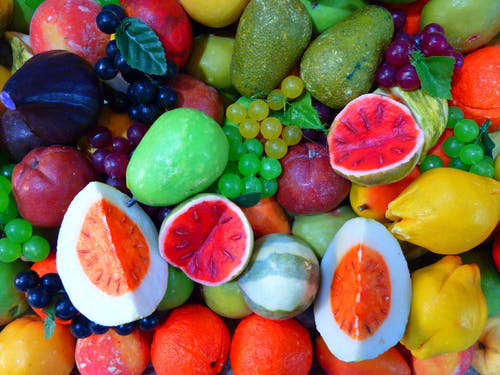

In [10]:
from PIL import Image
oImage = Image.open('Fruits.jpeg')
oImage

In [11]:
mI = np.array(oImage)
mI.shape

(375, 500, 3)

#### Conver to LAB color space:

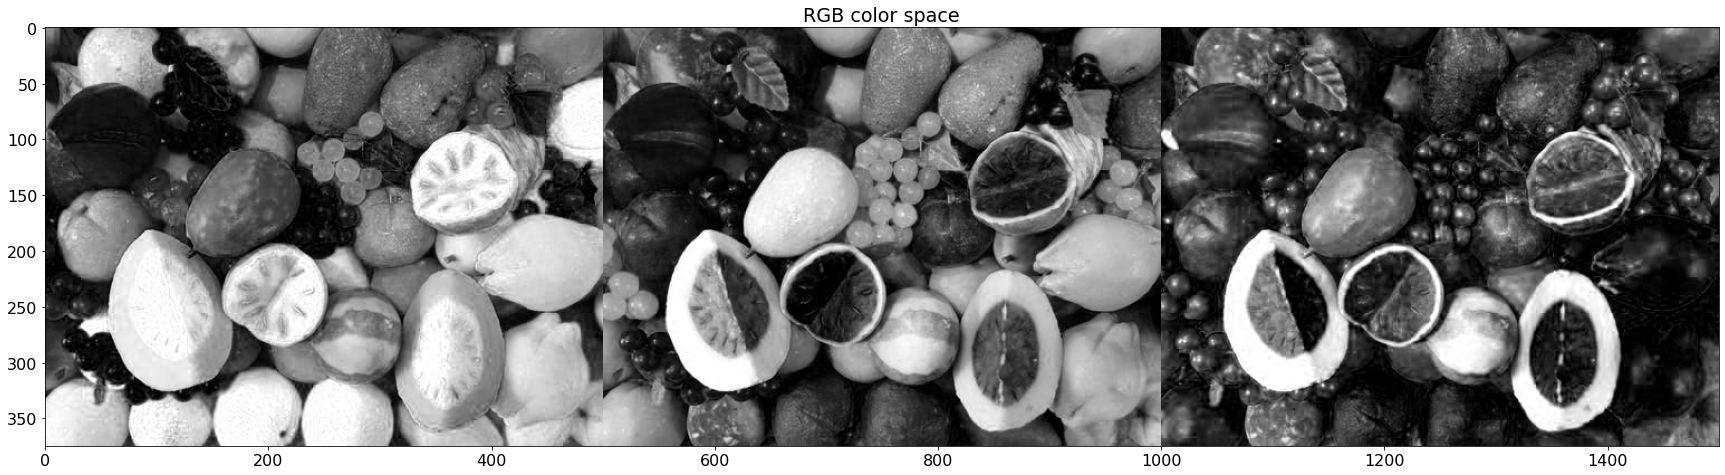

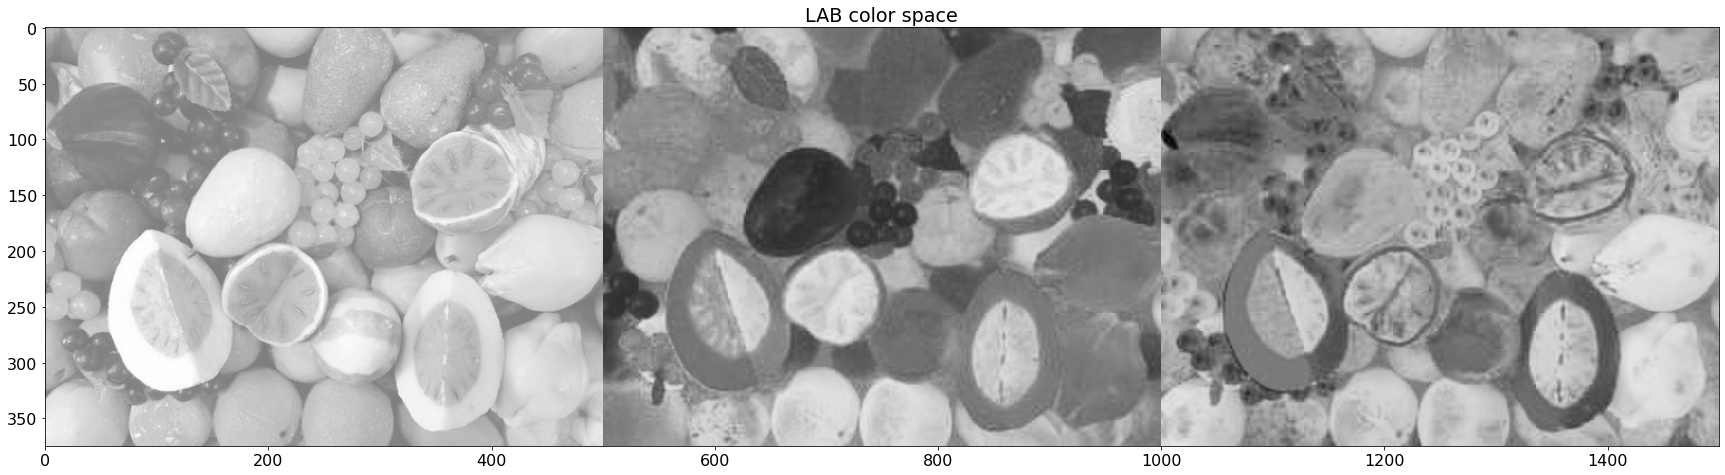

In [12]:
from skimage import color

mLAB = color.rgb2lab(mI)
plt.figure(figsize=(30, 10))
plt.imshow(np.c_[mI[:,:,0], mI[:,:,1], mI[:,:,2]], cmap='gray')
plt.title ('RGB color space')

plt.figure(figsize=(30, 10))
plt.imshow(np.c_[mLAB[:,:,0], mLAB[:,:,1], mLAB[:,:,2]], cmap='gray')
plt.title ('LAB color space')
plt.show  ()

#### Create `mX`:

In [13]:
height, width, _ = mI.shape
vX               = np.arange(width)
vY               = np.arange(height)
mXX, mYY         = np.meshgrid(vX, vY)

mX               = np.concatenate((???)), axis=2)
mX.shape

SyntaxError: invalid syntax (<ipython-input-13-1beab56675b7>, line 6)

#### Apply K-Means:
Hint: consider using `np.reshape`

In [ ]:
???
oKmeans = KMeans(n_clusters=???, n_init=???).fit(???)

#### Create mask:
Hint: consider using `oKmeans.predict`

In [ ]:
mMask = ???

#### Plot:

In [ ]:
from skimage.segmentation import mark_boundaries

mO = mark_boundaries(mI, mMask, color=(0,1,1))

plt.figure(figsize=(12, 12))
plt.imshow(mO)
plt.show  ()